**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Get the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Saving figure attribute_histogram_plots


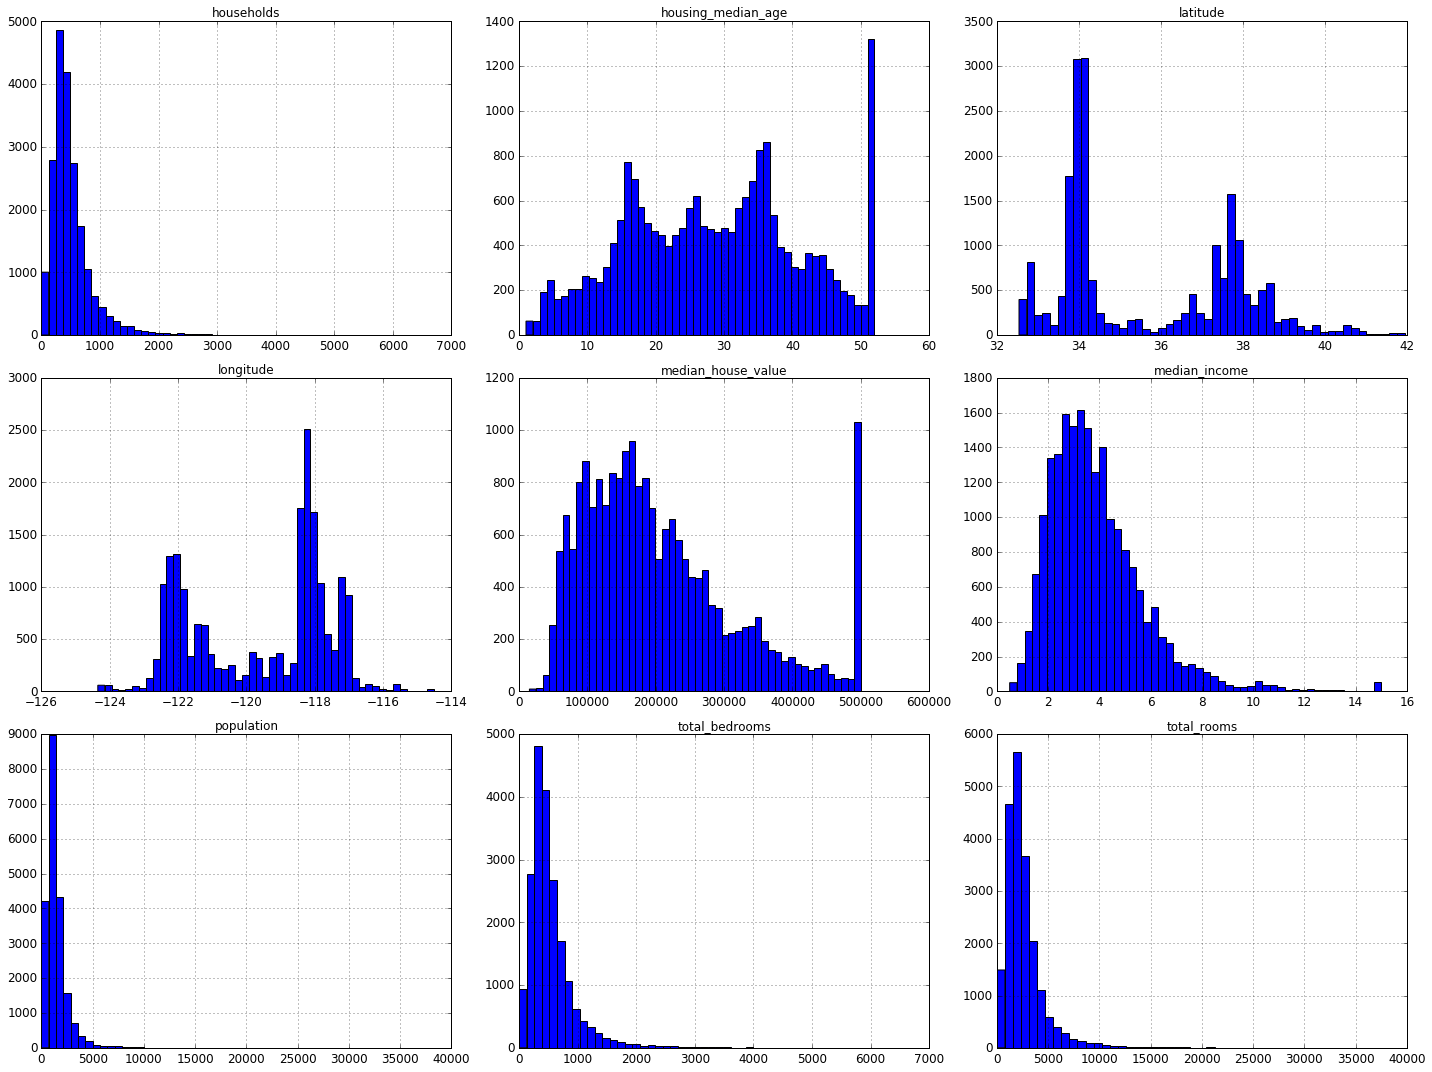

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
# This version supports both Python 2 and Python 3, instead of just Python 3.
def test_set_check(identifier, test_ratio, hash):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [15]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [17]:
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
8       8    -122.26     37.84                42.0       2555.0   
10     10    -122.26     37.85                52.0       2202.0   
11     11    -122.26     37.85                52.0       3503.0   
12     12    -122.26     37.85                52.0       2491.0   
13     13    -122.26     37.84                52.0        696.0   

    total_bedrooms  population  households  median_income  median_house_value  \
8            665.0      1206.0       595.0         2.0804            226700.0   
10           434.0       910.0       402.0         3.2031            281500.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
12           474.0      1098.0       468.0         3.0750            213500.0   
13           191.0       345.0       174.0         2.6736            191300.0   

   ocean_proximity         id  
8         NEAR BAY -122222.16  
10        NEAR BAY -122222.15  
11        NEAR BAY -122222.15  
12        NEAR BAY -122222.15  
13        NEAR BAY -122222.16

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

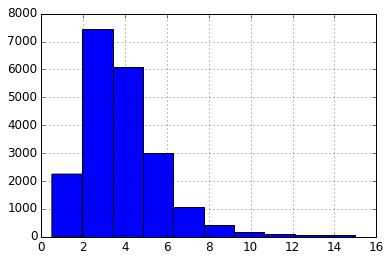

In [20]:
housing["median_income"].hist()

In [21]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [22]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

Overall    Random  Stratified  Rand. %error  Strat. %error
1.0  0.039826  0.040213    0.039729      0.973236      -0.243309
2.0  0.318847  0.324370    0.318798      1.732260      -0.015195
3.0  0.350581  0.358527    0.350533      2.266446      -0.013820
4.0  0.176308  0.167393    0.176357     -5.056334       0.027480
5.0  0.114438  0.109496    0.114583     -4.318374       0.127011

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [28]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


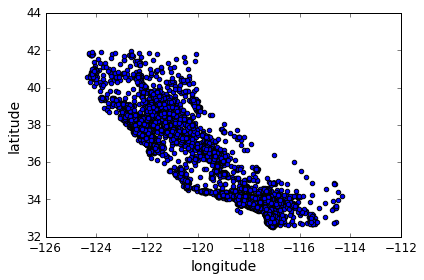

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


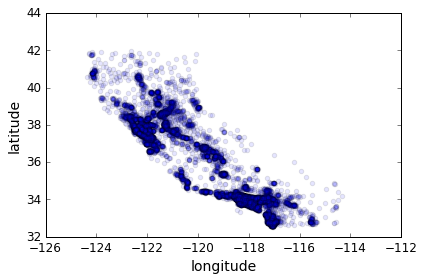

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


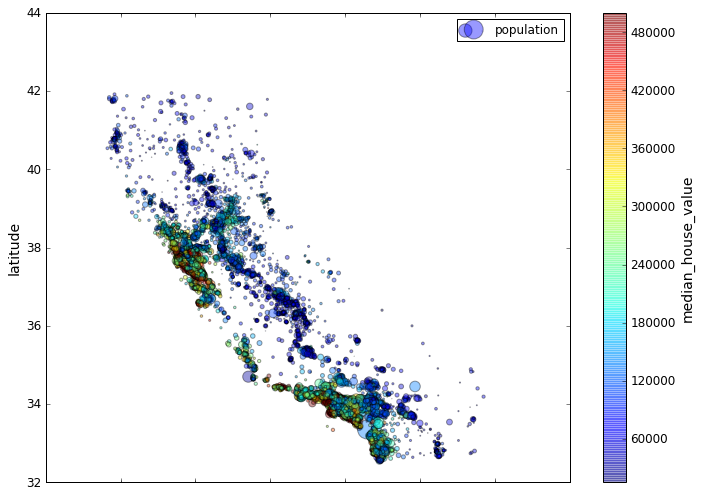

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
save_fig("housing_prices_scatterplot")

Saving figure california_housing_prices_plot


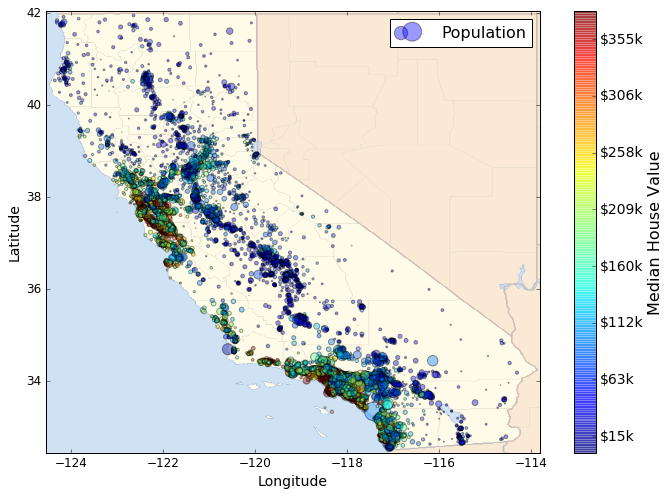

In [32]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure income_vs_house_value_scatterplot


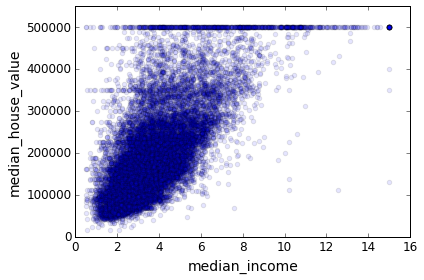

In [35]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

Saving figure scatter_matrix_plot


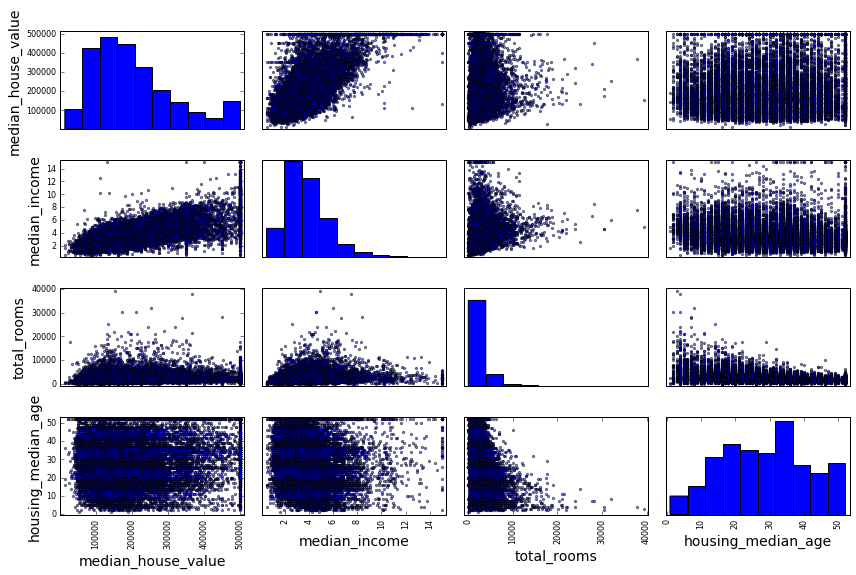

In [36]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

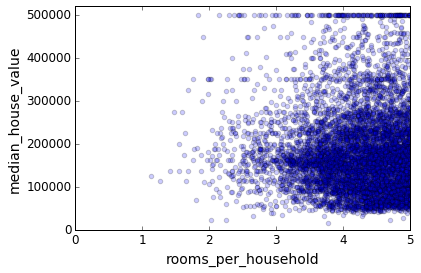

In [39]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [40]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575834     35.639577           28.653101   2622.728319   
std        2.001860      2.138058           12.574726   2138.458419   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.500000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16354.000000  16512.000000  16512.000000   16512.000000   
mean       534.973890   1419.790819    497.060380       3.875589   
std        412.699041   1115.686241    375.720845       1.904950   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.566775   
50%        433.000000   1164.000000    408.000000       3.540900   
75%        644.000000   1719.250000    602.000000       4.744475   
max       6210.000000  35682.000000   5358.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16354.000000   
mean        206990.920724             5.440341           0.212878   
std         115703.014830             2.611712           0.057379   
min          14999.000000             1.130435           0.100000   
25%         119800.000000             4.442040           0.175304   
50%         179500.000000             5.232284           0.203031   
75%         263900.000000             6.056361           0.239831   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   3.096437  
std                   11.584826  
min                    0.692308  
25%                    2.431287  
50%                    2.817653  
75%                    3.281420  
max                 1243.333333

# Prepare the data for Machine Learning algorithms

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [42]:
housing.iloc[21:24]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   

       population  households  median_income ocean_proximity  
18086      1585.0       568.0         9.2298       <1H OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
13600       744.0       274.0         3.7188          INLAND

In [43]:
housing_copy = housing.copy().iloc[21:24]
housing_copy.dropna(subset=["total_bedrooms"])    # option 1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   

       population  households  median_income ocean_proximity  
18086      1585.0       568.0         9.2298       <1H OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
13600       744.0       274.0         3.7188          INLAND

In [44]:
housing_copy = housing.copy().iloc[21:24]
housing_copy.drop("total_bedrooms", axis=1)       # option 2

longitude  latitude  housing_median_age  total_rooms  population  \
18086    -122.05     37.31                25.0       4111.0      1585.0   
16718    -120.66     35.49                17.0       4422.0      2307.0   
13600    -117.25     34.16                37.0       1709.0       744.0   

       households  median_income ocean_proximity  
18086       568.0         9.2298       <1H OCEAN  
16718       885.0         2.8285       <1H OCEAN  
13600       274.0         3.7188          INLAND

In [45]:
housing_copy = housing.copy().iloc[21:24]
median = housing_copy["total_bedrooms"].median()
housing_copy["total_bedrooms"].fillna(median, inplace=True) # option 3
housing_copy

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   

       population  households  median_income ocean_proximity  
18086      1585.0       568.0         9.2298       <1H OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
13600       744.0       274.0         3.7188          INLAND

In [46]:
housing_copy.drop("total_bedrooms", axis=1)       # option 2

longitude  latitude  housing_median_age  total_rooms  population  \
18086    -122.05     37.31                25.0       4111.0      1585.0   
16718    -120.66     35.49                17.0       4422.0      2307.0   
13600    -117.25     34.16                37.0       1709.0       744.0   

       households  median_income ocean_proximity  
18086       568.0         9.2298       <1H OCEAN  
16718       885.0         2.8285       <1H OCEAN  
13600       274.0         3.7188          INLAND

In [47]:
median = housing_copy["total_bedrooms"].median()
housing_copy["total_bedrooms"].fillna(median, inplace=True) # option 3
housing_copy

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18086    -122.05     37.31                25.0       4111.0           538.0   
16718    -120.66     35.49                17.0       4422.0           945.0   
13600    -117.25     34.16                37.0       1709.0           278.0   

       population  households  median_income ocean_proximity  
18086      1585.0       568.0         9.2298       <1H OCEAN  
16718      2307.0       885.0         2.8285       <1H OCEAN  
13600       744.0       274.0         3.7188          INLAND

In [48]:
# Summary...
housing_copy = housing.copy().iloc[21:24]
housing_copy.dropna(subset=["total_bedrooms"])    # option 1

housing_copy = housing.copy().iloc[21:24]
housing_copy.drop("total_bedrooms", axis=1)       # option 2

housing_copy = housing.copy().iloc[21:24]
median = housing_copy["total_bedrooms"].median()
housing_copy["total_bedrooms"].fillna(median, inplace=True) # option 3

In [49]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [50]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [51]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [52]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [53]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [54]:
X = imputer.transform(housing_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [56]:
housing_tr.iloc[21:24]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
21    -122.05     37.31                25.0       4111.0           538.0   
22    -120.66     35.49                17.0       4422.0           945.0   
23    -117.25     34.16                37.0       1709.0           278.0   

    population  households  median_income  
21      1585.0       568.0         9.2298  
22      2307.0       885.0         2.8285  
23       744.0       274.0         3.7188

In [57]:
imputer.strategy

'median'

In [58]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621  
3      1460.0       353.0         1.8839  
4      4459.0      1463.0         3.0347

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [60]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [63]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [65]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -121.89    37.29                 38        1568            351        710   
1   -121.93    37.05                 14         679            108        306   
2    -117.2    32.77                 31        1952            471        936   
3   -119.61    36.31                 25        1847            371       1460   
4   -118.59    34.23                 17        6592           1525       4459   

  households median_income ocean_proximity rooms_per_household  \
0        339        2.7042       <1H OCEAN             4.62537   
1        113        6.4214       <1H OCEAN             6.00885   
2        462        2.8621      NEAR OCEAN             4.22511   
3        353        1.8839          INLAND             5.23229   
4       1463        3.0347       <1H OCEAN             4.50581   

  population_per_household  
0                   2.0944  
1                  2.70796  
2                  2.02597  
3                  4.13598  
4                  3.04785

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [69]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [70]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 16)

# Prepare the data for Machine Learning algorithms

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
# let's try the full pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [74]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [75]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [76]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

In [77]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.895990018973

In [78]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [79]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 69316.02634772  65498.84994772  71404.25935862  69098.46240168
  70580.30735263  75540.88413124  69717.93143674  70428.42648461
  75888.17618283  68976.12268448]
Mean: 70644.9446328
Standard deviation: 2938.93789263


In [82]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66760.97371572  66962.61914244  70349.94853401  74757.02629506
  68031.13388938  71193.84183426  64968.13706527  68261.95557897
  71527.64217874  67665.10082067]
Mean: 69047.8379055
Standard deviation: 2735.51074287


In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [84]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22252.738943108321

In [85]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 52869.23106834  49189.93801195  51726.73647871  54995.98190463
  50979.93079904  55978.43765914  52283.7609046   51001.92227546
  54447.35786983  53389.94422283]
Mean: 52686.3241195
Standard deviation: 1971.26547795


In [86]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69047.837905
std       2883.481504
min      64968.137065
25%      67138.239562
50%      68146.544734
75%      70982.868509
max      74757.026295
dtype: float64

In [87]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [89]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64912.0351358 {'max_features': 2, 'n_estimators': 3}
55535.2786524 {'max_features': 2, 'n_estimators': 10}
52940.2696165 {'max_features': 2, 'n_estimators': 30}
60384.0908354 {'max_features': 4, 'n_estimators': 3}
52709.9199934 {'max_features': 4, 'n_estimators': 10}
50503.5985321 {'max_features': 4, 'n_estimators': 30}
59058.1153485 {'max_features': 6, 'n_estimators': 3}
52172.0292957 {'max_features': 6, 'n_estimators': 10}
49958.9555932 {'max_features': 6, 'n_estimators': 30}
59122.260006 {'max_features': 8, 'n_estimators': 3}
52441.5896087 {'max_features': 8, 'n_estimators': 10}
50041.4899416 {'max_features': 8, 'n_estimators': 30}
62371.1221202 {'max_features': 2, 'n_estimators': 3, 'bootstrap': False}
54572.2557534 {'max_features': 2, 'n_estimators': 10, 'bootstrap': False}
59634.0533132 {'max_features': 3, 'n_estimators': 3, 'bootstrap': False}
52456.0883904 {'max_features': 3, 'n_estimators': 10, 'bootstrap': False}
58825.665239 {'max_features': 4, 'n_estimators': 3, 'bootstrap'

In [92]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.058680         0.003157    -4.213572e+09     -1.122089e+09   
1        0.181340         0.008700    -3.084167e+09     -5.686194e+08   
2        0.524063         0.023446    -2.802672e+09     -4.390709e+08   
3        0.083630         0.002814    -3.646238e+09     -9.779480e+08   
4        0.268967         0.007684    -2.778336e+09     -5.111719e+08   
5        0.861705         0.023370    -2.550613e+09     -3.959620e+08   
6        0.115346         0.002827    -3.487861e+09     -9.302686e+08   
7        0.373814         0.007777    -2.721921e+09     -5.009736e+08   
8        1.208846         0.023714    -2.495897e+09     -3.848766e+08   
9        0.167649         0.003091    -3.495442e+09     -8.965714e+08   
10       0.551431         0.008504    -2.750120e+09     -5.032131e+08   
11       1.518100         0.023220    -2.504151e+09     -3.825022e+08   
12       0.095138         0.003623    -3.890157e+09      0.000000e+00   
13       0.294932         0.010242    -2.978131e+09      0.000000e+00   
14       0.113299         0.003353    -3.556220e+09      0.000000e+00   
15       0.382554         0.009926    -2.751641e+09      0.000000e+00   
16       0.159319         0.003432    -3.460459e+09      0.000000e+00   
17       0.493186         0.009612    -2.705352e+09      0.000000e+00   

   param_bootstrap param_max_features param_n_estimators  \
0              NaN                  2                  3   
1              NaN                  2                 10   
2              NaN                  2                 30   
3              NaN                  4                  3   
4              NaN                  4                 10   
5              NaN                  4                 30   
6              NaN                  6                  3   
7              NaN                  6                 10   
8              NaN                  6                 30   
9              NaN                  8                  3   
10             NaN                  8                 10   
11             NaN                  8                 30   
12           False                  2                  3   
13           False                  2                 10   
14           False                  3                  3   
15           False                  3                 10   
16           False                  4                  3   
17           False                  4                 10   

                                               params  rank_test_score  \
0              {'max_features': 2, 'n_estimators': 3}               18   
1             {'max_features': 2, 'n_estimators': 10}               11   
2             {'max_features': 2, 'n_estimators': 30}                9   
3              {'max_features': 4, 'n_estimators': 3}               16   
4             {'max_features': 4, 'n_estimators': 10}                8   
5             {'max_features': 4, 'n_estimators': 30}                3   
6              {'max_features': 6, 'n_estimators': 3}               13   
7             {'max_features': 6, 'n_estimators': 10}                5   
8             {'max_features': 6, 'n_estimators': 30}                1   
9              {'max_features': 8, 'n_estimators': 3}               14   
10            {'max_features': 8, 'n_estimators': 10}                6   
11            {'max_features': 8, 'n_estimators': 30}                2   
12  {'max_features': 2, 'n_estimators': 3, 'bootst...               17   
13  {'max_features': 2, 'n_estimators': 10, 'boots...               10   
14  {'max_features': 3, 'n_estimators': 3, 'bootst...               15   
15  {'max_features': 3, 'n_estimators': 10, 'boots...                7   
16  {'max_features': 4, 'n_estimators': 3, 'bootst...               12   
17  {'max_features': 4, 'n_estimators': 10, 'boots...                4   

    split0_test_score       ...         split2_test_score  split2_tr

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fdde0a320>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fdde026d8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [94]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50239.6442738 {'max_features': 3, 'n_estimators': 121}
50307.8432326 {'max_features': 3, 'n_estimators': 187}
49185.0150532 {'max_features': 6, 'n_estimators': 88}
49133.3305418 {'max_features': 5, 'n_estimators': 137}
49021.6318804 {'max_features': 7, 'n_estimators': 197}
49636.8878839 {'max_features': 6, 'n_estimators': 39}
52273.457854 {'max_features': 2, 'n_estimators': 50}
54413.8506712 {'max_features': 1, 'n_estimators': 184}
51953.3364641 {'max_features': 2, 'n_estimators': 71}
49174.1414792 {'max_features': 6, 'n_estimators': 140}


In [95]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.38167445e-02,   6.93425001e-02,   4.41741354e-02,
         1.80040251e-02,   1.65486595e-02,   1.80013616e-02,
         1.59794977e-02,   3.32716759e-01,   5.57319056e-02,
         1.05464076e-01,   8.70481930e-02,   9.90812199e-03,
         1.43083072e-01,   1.03976446e-04,   3.87833961e-03,
         6.19863203e-03])

In [96]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.33271675888101543, 'median_income'),
 (0.143083072155538, 'INLAND'),
 (0.10546407641519769, 'pop_per_hhold'),
 (0.087048193008911728, 'bedrooms_per_room'),
 (0.073816744482605889, 'longitude'),
 (0.069342500136275007, 'latitude'),
 (0.055731905592885149, 'rooms_per_hhold'),
 (0.0441741353556422, 'housing_median_age'),
 (0.018004025077788675, 'total_rooms'),
 (0.018001361574586823, 'population'),
 (0.016548659526332148, 'total_bedrooms'),
 (0.015979497714769569, 'households'),
 (0.0099081219902823602, '<1H OCEAN'),
 (0.0061986320346514171, 'NEAR OCEAN'),
 (0.003878339607642522, 'NEAR BAY'),
 (0.00010397644587548846, 'ISLAND')]

In [97]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [98]:
final_rmse

47728.481110152476

# Extra material

## Label Binarizer hack
`LabelBinarizer`'s `fit_transform()` method only accepts one parameter `y` (because it was meant for labels, not predictors), so it does not work in a pipeline where the final estimator is a supervised estimator because in this case its `fit()` method takes two parameters `X` and `y`.

This hack creates a supervision-friendly `LabelBinarizer`.

In [99]:
class SupervisionFriendlyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(SupervisionFriendlyLabelBinarizer, self).fit_transform(X)

# Replace the Labelbinarizer with a SupervisionFriendlyLabelBinarizer
cat_pipeline.steps[1] = ("label_binarizer", SupervisionFriendlyLabelBinarizer())

# Now you can create a full pipeline with a supervised predictor at the end.
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 210644.60459286,  317768.80697211,  210956.43331178,
         59218.98886849,  189747.55849879])

## Model persistence using joblib

In [100]:
my_model = full_pipeline_with_predictor

In [101]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`

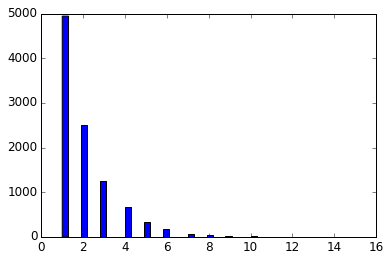

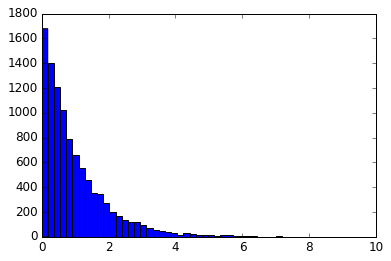

In [102]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000)
expon_distrib=expon(scale=1).rvs(10000)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg,param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] kernel=linear, C=10.0 ...........................................
[CV] kernel=linear, C=10.0 ...........................................
[CV] kernel=linear, C=10.0 ...........................................
[CV] kernel=linear, C=10.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=  13.3s
[CV] kernel=linear, C=10.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=  13.6s
[CV] kernel=linear, C=30.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=  13.8s
[CV] kernel=linear, C=30.0 ...........................................
[CV] ............................ kernel=linear, C=10.0, total=  14.3s
[CV] kernel=linear, C=30.0 ...........................................
[CV] ............................ kernel=linear, C=30.0, total=  13.7s
[CV] kernel=lin

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.1min


[CV] ......................... kernel=linear, C=10000.0, total=  19.4s
[CV] kernel=linear, C=30000.0 ........................................
[CV] ......................... kernel=linear, C=10000.0, total=  17.8s
[CV] kernel=linear, C=30000.0 ........................................
[CV] ......................... kernel=linear, C=30000.0, total=  30.9s
[CV] kernel=linear, C=30000.0 ........................................
[CV] ......................... kernel=linear, C=30000.0, total=  32.9s
[CV] kernel=rbf, gamma=0.01, C=1.0 ...................................
[CV] ......................... kernel=linear, C=30000.0, total=  34.2s
[CV] kernel=rbf, gamma=0.01, C=1.0 ...................................
[CV] ......................... kernel=linear, C=30000.0, total=  33.2s
[CV] kernel=rbf, gamma=0.01, C=1.0 ...................................
[CV] ......................... kernel=linear, C=30000.0, total=  27.6s
[CV] kernel=rbf, gamma=0.01, C=1.0 ...................................
[CV] .

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 23.9min


[CV] .................... kernel=rbf, gamma=1.0, C=30.0, total=  24.7s
[CV] kernel=rbf, gamma=3.0, C=30.0 ...................................
[CV] .................... kernel=rbf, gamma=3.0, C=30.0, total=  24.3s
[CV] kernel=rbf, gamma=3.0, C=30.0 ...................................
[CV] .................... kernel=rbf, gamma=3.0, C=30.0, total=  23.5s
[CV] kernel=rbf, gamma=0.01, C=100.0 .................................
[CV] .................... kernel=rbf, gamma=3.0, C=30.0, total=  23.6s
[CV] kernel=rbf, gamma=0.01, C=100.0 .................................
[CV] .................... kernel=rbf, gamma=3.0, C=30.0, total=  22.8s
[CV] kernel=rbf, gamma=0.01, C=100.0 .................................
[CV] .................... kernel=rbf, gamma=3.0, C=30.0, total=  23.8s
[CV] kernel=rbf, gamma=0.01, C=100.0 .................................
[CV] .................. kernel=rbf, gamma=0.01, C=100.0, total=  23.9s
[CV] kernel=rbf, gamma=0.01, C=100.0 .................................
[CV] .

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 38.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [104]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.903139641669

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [105]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy-0.19.0/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] kernel=rbf, gamma=1.51674603578, C=17619.0226696 ................
[CV] kernel=rbf, gamma=1.51674603578, C=17619.0226696 ................
[CV] kernel=rbf, gamma=1.51674603578, C=17619.0226696 ................
[CV] kernel=rbf, gamma=1.51674603578, C=17619.0226696 ................
[CV] . kernel=rbf, gamma=1.51674603578, C=17619.0226696, total=  25.1s
[CV] kernel=rbf, gamma=1.51674603578, C=17619.0226696 ................
[CV] . kernel=rbf, gamma=1.51674603578, C=17619.0226696, total=  25.8s
[CV] kernel=linear, gamma=2.55261533397, C=32650.9213888 .............
[CV] . kernel=rbf, gamma=1.51674603578, C=17619.0226696, total=  26.1s
[CV] kernel=linear, gamma=2.55261533397, C=32650.9213888 .............
[CV] . kernel=rbf, gamma=1.51674603578, C=17619.0226696, total=  26.5s
[CV] kernel=linear, gamma=2.55261533397, C=32650.9213888 .............
[CV] . kernel=rbf, gamma=1.51674603578, C=17619.0226696, total=  25.6s
[CV] kernel=lin

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.9min


[CV] . kernel=rbf, gamma=1.14871488999, C=64183.7468485, total=  55.4s
[CV] kernel=linear, gamma=2.69325065373, C=353.319347039 .............
[CV] . kernel=rbf, gamma=1.14871488999, C=64183.7468485, total= 1.0min
[CV] kernel=linear, gamma=2.69325065373, C=353.319347039 .............
[CV]  kernel=linear, gamma=2.69325065373, C=353.319347039, total=  13.1s
[CV] kernel=linear, gamma=2.69325065373, C=353.319347039 .............
[CV]  kernel=linear, gamma=2.69325065373, C=353.319347039, total=  13.4s
[CV] kernel=linear, gamma=0.633497950966, C=49626.0116316 ............
[CV]  kernel=linear, gamma=2.69325065373, C=353.319347039, total=  14.9s
[CV] kernel=linear, gamma=0.633497950966, C=49626.0116316 ............
[CV] . kernel=rbf, gamma=1.14871488999, C=64183.7468485, total=  59.1s
[CV] kernel=linear, gamma=0.633497950966, C=49626.0116316 ............
[CV]  kernel=linear, gamma=2.69325065373, C=353.319347039, total=  14.9s
[CV] kernel=linear, gamma=0.633497950966, C=49626.0116316 ...........

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 27.3min


[CV]  kernel=rbf, gamma=0.591403361271, C=50.6919126218, total=  22.9s
[CV] kernel=linear, gamma=0.176398677175, C=35763.1223465 ............
[CV]  kernel=linear, gamma=0.176398677175, C=35763.1223465, total=  34.2s
[CV] kernel=linear, gamma=0.176398677175, C=35763.1223465 ............
[CV]  kernel=linear, gamma=0.176398677175, C=35763.1223465, total=  34.8s
[CV] kernel=linear, gamma=0.368167823502, C=15605.760224 .............
[CV]  kernel=linear, gamma=0.176398677175, C=35763.1223465, total=  37.3s
[CV] kernel=linear, gamma=0.368167823502, C=15605.760224 .............
[CV]  kernel=linear, gamma=0.176398677175, C=35763.1223465, total=  37.7s
[CV] kernel=linear, gamma=0.368167823502, C=15605.760224 .............
[CV]  kernel=linear, gamma=0.368167823502, C=15605.760224, total=  21.9s
[CV] kernel=linear, gamma=0.368167823502, C=15605.760224 .............
[CV]  kernel=linear, gamma=0.176398677175, C=35763.1223465, total=  30.8s
[CV] kernel=linear, gamma=0.368167823502, C=15605.760224 ...

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 41.5min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=4,
          param_distributions={'kernel': ['linear', 'rbf'], 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fddaa22b0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8fddaa2cc0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [107]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55081.775299884037

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [108]:
rnd_search.best_params_

{'C': 122659.12862707644, 'gamma': 0.22653313890837068, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

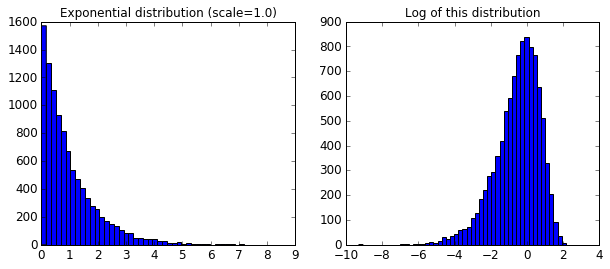

In [109]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

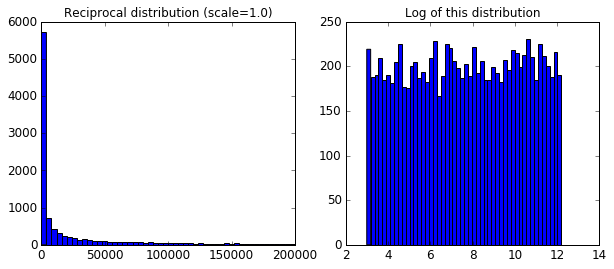

In [110]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [111]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [112]:
k = 5

Now let's look for the indices of the top k features:

In [113]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [114]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], 
      dtype='<U18')

Let's double check that these are indeed the top k features:

In [115]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.33271675888101543, 'median_income'),
 (0.143083072155538, 'INLAND'),
 (0.10546407641519769, 'pop_per_hhold'),
 (0.087048193008911728, 'bedrooms_per_room'),
 (0.073816744482605889, 'longitude')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [116]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [117]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [118]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

Now let's double check that these are indeed the top k features:

In [119]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [121]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [122]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer', Imputer(... gamma=0.22653313890837068, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

Let's try the full pipeline on a few instances:

In [123]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 188219.7227617   342150.67195185  172327.05447222   56235.78550693]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [124]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': [3, 4, 5, 6, 7]}
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3 
[CV] preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3 
[CV] preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3 
[CV] preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3 
[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3, total=  15.5s
[CV] preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3 
[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3, total=  15.6s
[CV] preparation__num_pipeline__imputer__strategy=median, feature_selection__k=3 
[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3, total=  15.6s
[CV] preparation__num_pipeline__imputer__strategy=median, feature_selection__k=3 
[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=3, total=  1

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.9min


[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=5, total=  30.9s
[CV] preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5 
[CV]  preparation__num_pipeline__imputer__strategy=mean, feature_selection__k=5, total=  32.8s
[CV] preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5 
[CV]  preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5, total=  32.5s
[CV] preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5 
[CV]  preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5, total=  34.8s
[CV] preparation__num_pipeline__imputer__strategy=most_frequent, feature_selection__k=5 
[CV]  preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5, total=  33.1s
[CV] preparation__num_pipeline__imputer__strategy=most_frequent, feature_selection__k=5 
[CV]  preparation__num_pipeline__imputer__strategy=median, feature_selection__k=5, total=  30.9

[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed: 13.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer', Imputer(... gamma=0.22653313890837068, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [3, 4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [125]:
grid_search_prep.best_params_

{'feature_selection__k': 7,
 'preparation__num_pipeline__imputer__strategy': 'median'}

Great! It seems that we had the right imputer stragegy (mean), and apparently only the top 7 features are useful (out of 9), the last 2 seem to just add some noise.

In [126]:
housing.shape

(16512, 9)

Congratulations! You already know quite a lot about Machine Learning. :)